## Семинар 13
# Тема: Кластеризация

_Кластеризация_ относится к методам обучения без учителя. 

Задача кластеризации состоит в разбиении множества исходных объектов на подмножества близких по свойствам объектов. Понятие _близости_ формализуется при помощи задания _метрики_, или расстояния между объектами $\rho\left(x_i,x_j\right)$. 

### Метод k-means.
Познакомимся с одним из наиболее известных алгоритмов кластеризации: _k-means_ или _k средних_. 

Алгоритм метода выглядит следующим образом:

1. Случайным образом выбираются k точек $x_k \in X$, в дальнейшем будем называть их центрами кластеров (центроидами);

2. Для каждой точки $x_i \in X$ вычисляется $\rho\left(x_i,x_k\right)$, после чего ей ставится в соответствие  ближайший к ней центр кластера. Совокупность точек, отнесённых к центру $x_k$ называется кластером;

3. Вычисляются средние взвешенные точек (центры масс), принадлежащих к определённому кластеру. Эти значения становятся новыми центрами кластеров;

4. Шаги 2 и 3 повторяются до тех пор, пока пересчёт центров кластеров будет существенно менять местоположение кластеров. Как только высчитанные центры кластеров совпадут с предыдущими, алгоритм будет окончен.

Следует иметь в виду, что этот алгоритм хорошо работает только для нормальных выборок, причем кластеры не должны существенно перекрываться.

Недостатком алгоритма является то, что число кластеров в нем - гиперпараметр, т.е. должно быть задано изначально.


### Метод DBSCAN.

Познакомиться с методом машинного обучения DBSCAN, осуществляющим группировку наблюдений в кластеры высокой плотности.

DBSCAN имеет три основных устанавливаемых параметра:

♦ eps — максимальное расстояние от наблюдения, чтобы считать другое наблюдение его соседом;

♦ min sampies — минимальное число наблюдений, находящихся на расстоянии менее eps от наблюдения, для того чтобы его можно было считать ключевым наблюдением;

♦ metric— метрический показатель расстояния, используемый параметром eps, 
например minkowski или euclidean (обратите внимание, что если используется
расстояние Минковского, то может быть использован параметр р для установки
мощности метрического показателя Минковского).

Наблюдения подразделяются на три типа точек:

1. Центральная точка (точка данных является центральной, если круг радиуса eps вокруг нее содержит не менее min_sampies точек)

2. Граничная точка (количество точек меньше min_sampies, но есть хотя бы одна центральная)

3. Шум (нет ни одной центральной точки в круге радиуса eps вокруг нее)

Алгоритм хорошо работает с кластерами произвольной формы, число кластеров определяется в ходе работы алгоритма, а не задаётся, как гиперпараметр. Хуже работает на данных с разной плотностью.

Silhouette Score — это метрика для оценки качества результатов кластеризации. Она измеряет, насколько точка данных похожа на собственный кластер по сравнению с другими кластерами. Оценка варьируется от –1 до 1, где более высокое значение указывает на лучшую производительность кластеризации. Значение, близкое к 1, предполагает, что точки данных хорошо кластеризованы и правильно разделены, а значение, близкое к -1, указывает на то, что точки данных могли быть отнесены к неправильным кластерам. В коде Silhouette Score рассчитывается с помощью функции silhouette_score().

Загрузим необходимые библиотеки:

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

# Метод k-means.

### 1. Сформируйте данные при помощи make_blobs(n_samples=1000, centers=5, random_state=10). Выведите полученные данные в виде датафрейма, дав названия колонкам X1 и  X2. Визуализируйте их при помощи диаграммы рассеяния.

In [23]:
X, _ = make_blobs(
    n_samples = 1000,
    centers = 5,
    random_state = 10
)
df = pd.DataFrame(X, columns = ['X1', 'X2'])

In [24]:
df.head(5)

,X1,X2
0,4.401660,-9.424562
1,-6.706999,-8.433564
2,-6.253321,5.015825
3,7.411799,-8.137795
4,-4.839208,5.689303


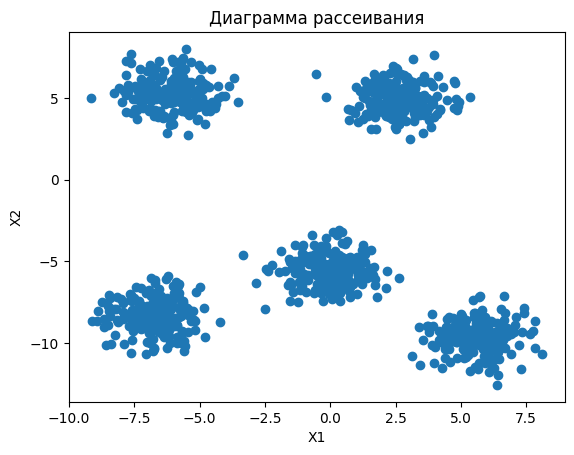

In [25]:
plt.scatter(df['X1'], df['X2'])
plt.title('Диаграмма рассеивания')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2. Масштабируйте данные при помощи MinMaxScaler.

In [26]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

In [27]:
df_scaled = pd.DataFrame(X_scaled, columns = ['X1', 'X2'])

In [28]:
df_scaled

,X1,X2
0,0.785333,0.152662
1,0.141640,0.200842
2,0.167929,0.854730
3,0.959756,0.215222
4,0.249870,0.887474
...,...,...
995,0.458138,0.369114
996,0.129393,0.856251
997,0.190075,0.178033
998,0.705233,0.898614


### 3. Создайте экземпляр класса k-средних с пятью кластерами, зафиксировав random_state = 42. Обучите эту модель на масштабированных данных. Выведите метки кластеров при помощи атрибута .labels_ и при помощи метода .predict(). Убедитесь, что результат будет одинаковый.

In [29]:
kmeans = KMeans(n_clusters = 5, random_state = 42)

In [33]:
kmeans.fit(df_scaled)

KMeans(n_clusters=5, random_state=42)

In [35]:
kmeans.labels_[:5]

array([2, 0, 3, 2, 3], dtype=int32)

In [36]:
kmeans.predict(df_scaled)[:5]

array([2, 0, 3, 2, 3], dtype=int32)

In [38]:
(kmeans.labels_ != kmeans.predict(df_scaled)).sum()

0

### 4. Выведите центры кластеров с помощью атрибута .cluster_centers_. Ремасштабируйте центры кластеров при помощи метода .inverse_transform().

In [39]:
centers = kmeans.cluster_centers_
centers

array([[0.14003281, 0.20773946],
       [0.68325617, 0.85205688],
       [0.8520994 , 0.1432125 ],
       [0.17895293, 0.86742103],
       [0.52600287, 0.34328769]])

In [40]:
centers_rescaled = scaler.inverse_transform(centers)
centers_rescaled

array([[-6.73474199, -8.29170239],
       [ 2.64004968,  4.96083603],
       [ 5.55389732, -9.61891479],
       [-6.06306977,  5.27685104],
       [-0.07378228, -5.50370058]])

### 5. Визуализируйте полученные кластеры, подкрасив их разными цветами. Также на этом рисунке укажите центры кластеров, пометив их красными ромбами.

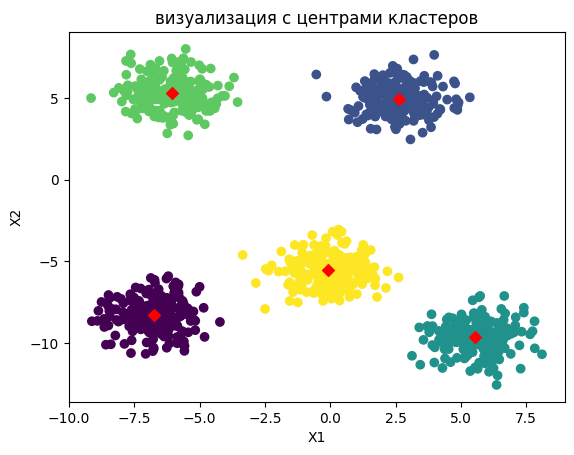

In [41]:
plt.scatter(df['X1'], df['X2'], c = kmeans.labels_)
plt.scatter (centers_rescaled[:,0], centers_rescaled[:,1], c = 'r', marker = 'D')
plt. title("визуализация с центрами кластеров")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 6. Выведите сумму квадратов расстояний образцов до ближайшего центра кластера при помощи атрибута .inertia_

In [42]:
kmeans.inertia_

5.329461618751006

### 7. Осуществите проверку правильности выбора гиперпараметра модели k-средних "количество кластеров" (n_clusters=5) методом локтя. Для этого постройте график зависимости количества кластеров от значения inertia_. Правильное количество кластеров будет тo, где построенная кривая имеет наиболее сильный излом ("локоть"), то есть то, после которого значение inertia_ перестаёт существенно снижаться.

In [50]:
inertias = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans. fit(df_scaled)
    inertia = kmeans.inertia_
    inertias.append(inertia)

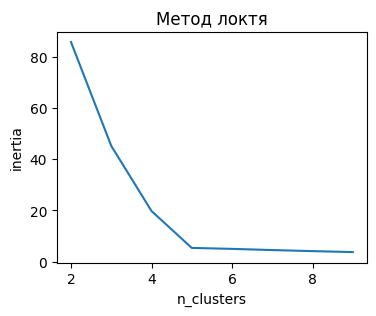

In [97]:
plt.figure(figsize = (4, 3))
plt.plot(range(2, 10), inertias)
plt.title('Метод локтя')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 8. Оцените качество кластеризации при помощи метрики Silhouette Score.

In [98]:
silhouette = silhouette_score(X, kmeans.labels_)
silhouette

0.39574336063263715

# Метод DBSCAN.

### 1. Загрузите встроенный датасет iris. В качестве рассматриваемых данных, возьмите второй и третий столбцы датасета. Выведите данные в виде датафрейма c названиями колонок. 

In [101]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data[:, 1:3], columns=['sepal width (cm)', 'sepal length (cm)'])
df_iris

,sepal width (cm),sepal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


### 2. Визуализируйте данные на диаграмме рассеяния.

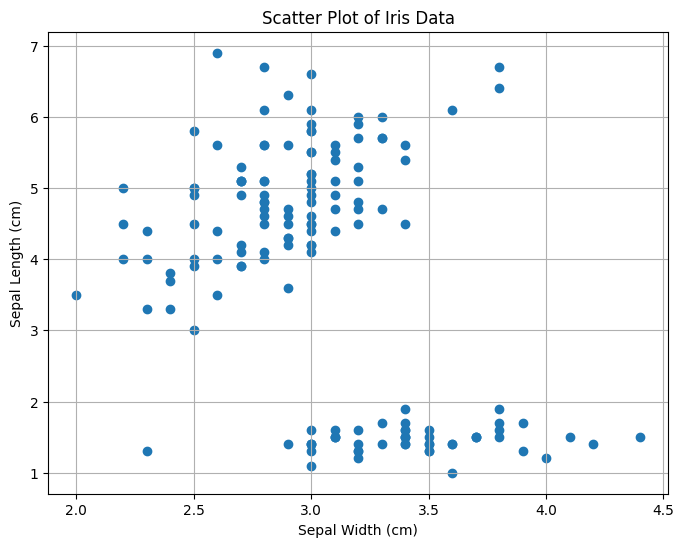

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(df_iris['sepal width (cm)'], df_iris['sepal length (cm)'])
plt.title('Scatter Plot of Iris Data')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.grid(True)
plt.show()

### 3. Стандартизируйте данные при помощи StandardScaler.

In [105]:
scaler = StandardScaler()
df_iris_scaled = pd.DataFrame(scaler.fit_transform(df_iris), columns=df_iris.columns)
df_iris_scaled.head()

,sepal width (cm),sepal length (cm)
0,1.019004,-1.340227
1,-0.131979,-1.340227
2,0.328414,-1.397064
3,0.098217,-1.283389
4,1.249201,-1.340227


### 4. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.

In [107]:
dbscan = DBSCAN(eps=0.65, min_samples=8, n_jobs=-1)
dbscan.fit(df_iris_scaled)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### 5. Выведите получившееся в результате работы алгоритма, количество кластеров.

In [108]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

2

### 6. Выведите количество наблюдений, отнесённых к шумам. Для шумов метка кластеров равна -1.

In [109]:
n_noise = list(labels).count(-1)
n_noise

0

### 7. Визуализируйте полученные кластеры и шумы, подкрасив их разными цветами. 

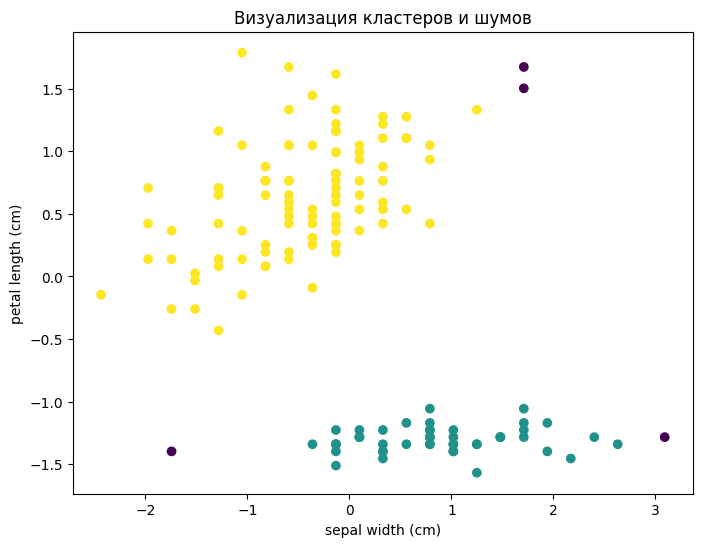

In [111]:
plt.figure(figsize=(8, 6))
plt.scatter(df_iris_scaled['sepal width (cm)'], df_iris_scaled['sepal length (cm)'], c=dbscan.labels_, cmap='viridis')
plt.title('Визуализация кластеров и шумов')
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

### 8. Оцените качество кластеризации при помощи метрики Silhouette Score.

In [112]:
silhuette = silhouette_score(df_iris, dbscan.labels_)
silhuette

0.6639710599136929

### Задания самостоятельного для выполнения:

### Метод k-means.
1. Загрузите прилагающийся датасет Mall_Customers.csv.
2. Оставьте в нём только два столбца Annual Income и Spending Score.
3. Масштабируйте данные при помощи StandardScaler.
4. Визуализируйте данные при помощи диаграммы рассеяния и сделайте предположение о количестве кластеров. 
5. Определите наилучшее число кластеров с помощью метода локтя.
6. Обучите модель k-средних с лучшим числом кластеров и предскажите метки кластеров для каждого значения из датасета.
7. Визуализируйте полученные кластеры разными цветами с изображением центров кластеров.
8. Оцените эффективность кластеризации с помощью метрики Silhouette Score.

### Метод DBSCAN.
1. Загрузите встроенный датасет iris. Выведите данные в виде датафрейма c названиями колонок. 
2. Стандартизируйте данные при помощи StandardScaler.
3. Создайте класс DBSCAN(n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.
4. Выведите получившееся в результате работы алгоритма, количество кластеров.
5. Выведите количество наблюдений, отнесённых к шумам. 
6. Оцените качество кластеризации при помощи метрики Silhouette Score.
7. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_. Оцените качество кластеризации при помощи метрики Silhouette Score и сделайте вывод о том, улучшилась ли работа алгоритма при изменении гиперпараметров модели. 
8. Повторите задание 7, используя Pipeline.